In [158]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [159]:
iris = load_iris()
x = iris['data']
y = np.array(pd.get_dummies(iris['target']))
labels = iris['target_names']

In [160]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.2, random_state=0)
train_x.dtype = 'float32'
test_x.dtype = 'float32'

In [161]:
train_x, train_y = tf.constant(train_x, dtype = 'float32'), tf.constant(train_y, dtype = 'float32')
test_x, test_y = tf.constant(test_x, dtype = 'float32'), tf.constant(test_y, dtype = 'float32')

In [162]:
in_features = train_x.shape[1]
out_classes = train_y.shape[1]

w = tf.Variable(tf.random.uniform([in_features, out_classes]), dtype = 'float32')
b = tf.Variable(tf.random.uniform([out_classes]))

In [163]:
def forward(x,w,b):
    out1 = tf.matmul(x,w)
    out2 = tf.add(out1,b)
    out3 = tf.nn.sigmoid(out2)
    return out3

In [164]:
def optimize(x,y):
    with tf.GradientTape() as tape :
        yhat = forward(train_x,w,b)
        loss = loss_object(y,yhat)
    grads = tape.gradient(loss,[w,b])
    opt.apply_gradients(zip(grads,[w,b]))
    return loss.numpy()

def accuracy(x,y):
    correct = 0
    incorrect = 0

    yhat = forward(x,w,b)
    for i in range(len(yhat)):
        if tf.math.argmax(yhat[i]) == tf.math.argmax(y[i]):
            correct += 1
        else :
            incorrect += 1

    acc = (correct / (incorrect + correct)) * 100
    return acc

In [165]:
epochs = 5000
loss_values = []
acc_values = []

lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.08,
                                          decay_steps=train_x.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
loss_object = tf.keras.losses.MeanSquaredLogarithmicError()
opt = tf.keras.optimizers.SGD(lr)


for epoch in range(epochs):
    loss = optimize(train_x,train_y)
    loss_values.append(loss)

    acc = accuracy(test_x,test_y)
    acc_values.append(acc)

    if epoch % (epochs/10) == 0 :
        print('Epoch : ', epoch)
        print(f'Loss : {loss} | Accuracy : {acc}')
        print('-' * 50)

Epoch :  0
Loss : 0.2752729654312134 | Accuracy : 36.666666666666664
--------------------------------------------------
Epoch :  500
Loss : 0.27087268233299255 | Accuracy : 36.666666666666664
--------------------------------------------------
Epoch :  1000
Loss : 0.26081234216690063 | Accuracy : 36.666666666666664
--------------------------------------------------
Epoch :  1500
Loss : 0.2483363151550293 | Accuracy : 36.666666666666664
--------------------------------------------------
Epoch :  2000
Loss : 0.24566899240016937 | Accuracy : 36.666666666666664
--------------------------------------------------
Epoch :  2500
Loss : 0.24535909295082092 | Accuracy : 36.666666666666664
--------------------------------------------------
Epoch :  3000
Loss : 0.24526692926883698 | Accuracy : 36.666666666666664
--------------------------------------------------
Epoch :  3500
Loss : 0.24522444605827332 | Accuracy : 36.666666666666664
--------------------------------------------------
Epoch :  4000


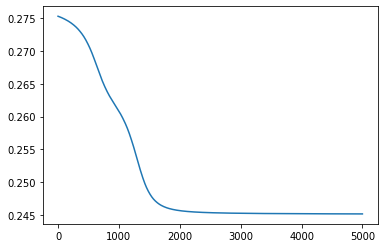

In [167]:
plt.plot(loss_values)